In [1]:
import numpy as np
import glob, sys
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 
import seaborn as sns
from matplotlib.lines import Line2D

In [2]:
matplotlib.rc('font',family='serif', serif=['Palatino'])
sns.set_style('white')

pgf_with_rc_fonts = {"pgf.texsystem": "pdflatex"}
matplotlib.rcParams.update(pgf_with_rc_fonts)
matplotlib.rcParams['text.usetex'] = True

def set_style():
    sns.set(font='serif', font_scale=1.4)
    
   # Make the background white, and specify the
    # specific font family
    sns.set_style("white", {
        "font.family": "serif",
        "font.weight": "normal",
        "font.serif": ["Times", "Palatino", "serif"],
        'axes.facecolor': 'white',
        'lines.markeredgewidth': 1})
    
def plot_sig_line(ax, x1, x2, y1, h, padding=0.3):
    '''
    Plots the bracket thing denoting significance in plots. h controls how tall vertically the bracket is.
    Only need one y coordinate (y1) since the bracket is parallel to the x-axis.
    '''
    ax.plot([x1, x1, x2, x2], [y1, y1 + h, y1 + h, y1], linewidth=1, color='k')
    ax.text(0.5*(x1 + x2), y1 + h + padding * h, '*', color='k', fontsize=16, fontweight='normal')

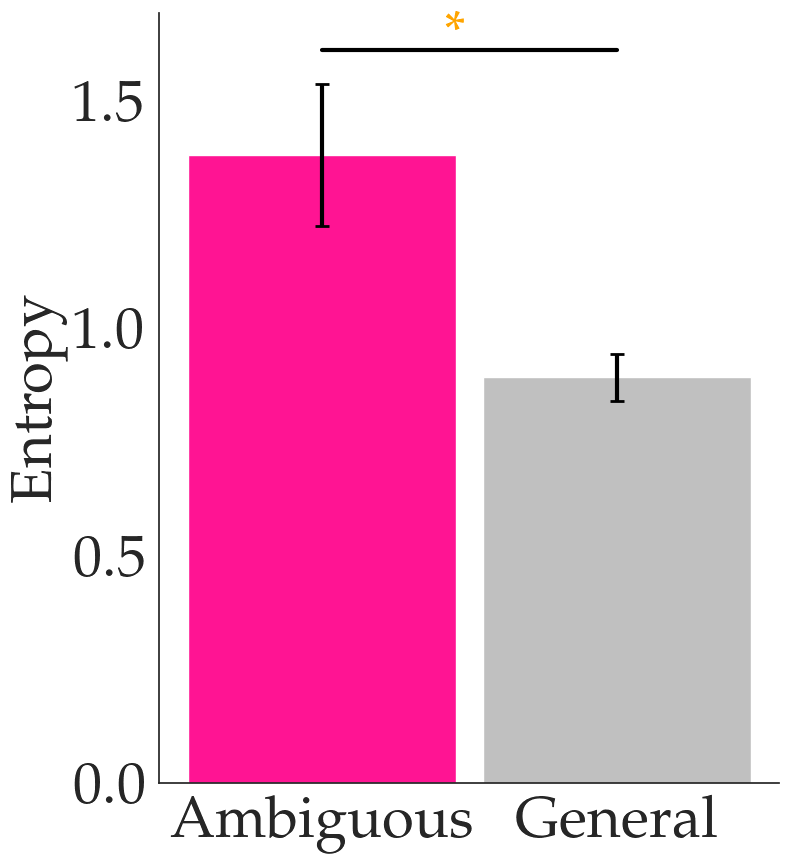

In [3]:
# Data
entropy_sim = [0.72, 0.72, 0.72, 0.88, 0.92, 1.15, 1.15, 0.88, 0.88]
#entropy_sim_err = [0.21]
entropy_h = [1.57, 1, 1.57]
#entropy_h_err = [0.39]

# print(np.mean(np.array(entropy_sim)), np.std(np.array(entropy_sim))/np.sqrt(9))
# print(np.mean(np.array(entropy_h)), np.std(np.array(entropy_h))/np.sqrt(3))

# Plot
fontsize = 42
matplotlib.rcParams.update({'font.size': fontsize})
plt.rcParams['xtick.labelsize']=fontsize
plt.rcParams['ytick.labelsize']=fontsize
set_style()
fig,ax = plt.subplots(figsize=(8,10))

# Adjust width for better visibility
width = 0.1

# Bar plots
error_config = {'capsize': 5, 'elinewidth': 3, 'capthick': 2, 'ecolor': 'black'}

ax.bar(0, np.mean(np.array(entropy_h)), yerr=np.std(np.array(entropy_h))/np.sqrt(3), width=width, error_kw=error_config, color='deeppink')
ax.bar(width+0.01, np.mean(np.array(entropy_sim)), yerr=np.std(np.array(entropy_sim))/np.sqrt(9), width=width, error_kw=error_config, color='silver')


# Add significance lines
p_vals = [0.0057]
for i, p_val in enumerate(p_vals):
    if p_val < 0.05:
        # Define the position and height for the significance line
        y_max = max(np.mean(np.array(entropy_h)) + np.std(np.array(entropy_h))/np.sqrt(3), 
                    np.mean(np.array(entropy_sim)) + np.std(np.array(entropy_sim))/np.sqrt(9))
        line_height = y_max + 0.05 * y_max  # adjust this value to set the height of the significance line
        
        # Draw the line
        ax.plot([i, i + width+0.01], [line_height, line_height], color='black', lw=3)
        
        # Optionally, you can also add the actual p-value or an asterisk (*) to denote significance
        if p_val < 0.001:
            ax.text(i+width/2, line_height + 0.0002 * y_max, '***', ha='center', color='orange', fontsize=40)  # 3 asterisks for p<0.001
        else:
            ax.text(i+width/2, line_height + 0.0002 * y_max, '*', ha='center',color='orange', fontsize=40)  # 1 asterisk for p<0.05


# Set y-ticks fontsize
ax.tick_params(axis="x", labelsize=42)
ax.tick_params(axis="y", labelsize=42)

# Set title and y-label
#ax.set_title("Entropy Estimation over LM Preferences")
ax.set_ylabel("Entropy", fontsize=fontsize)

# Setting xticks in the middle of the grouped bars
ax.set_xticks([0, width+0.01])
ax.set_xticklabels(["Ambiguous", "General"])

sns.despine(fig)
plt.savefig('h2.pdf', format='pdf', bbox_inches='tight')
plt.show()


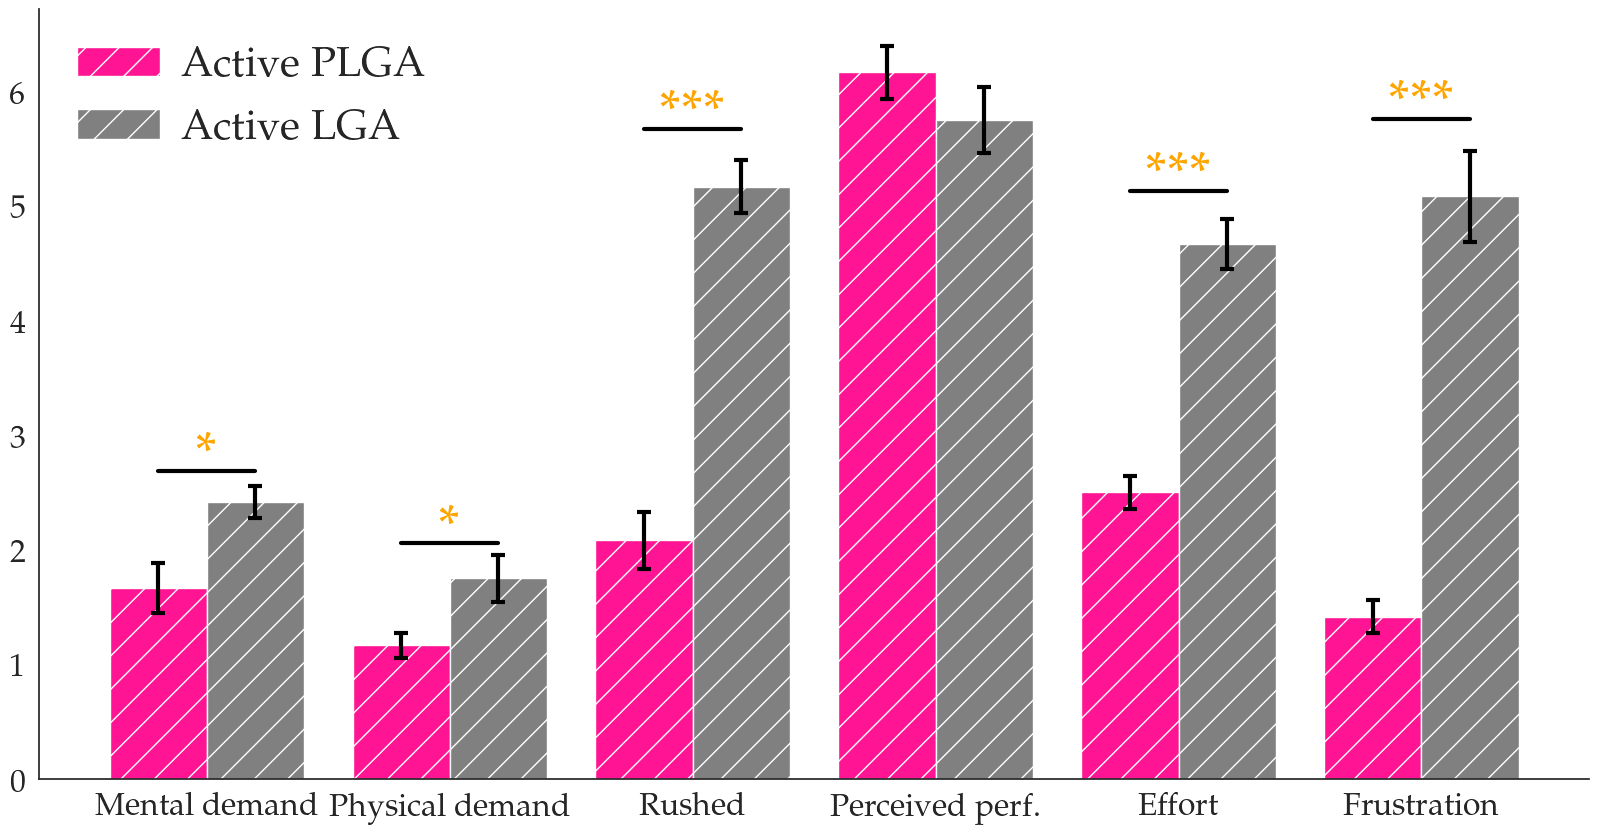

In [5]:

# Data
# ilga_tlx = [1.7, 1.2, 2.1, 6.2, 2.5, 1.4]
# ilta_tlx_err = [0.2, 0.4, 0.3, 0.2, 0.6, 0.1]
# lga_tlx = [2.4, 1.8, 5.2, 5.8, 4.7, 5.1]
# lga_tlx_err = [0.1, 0.4, 0.1, 0.1, 0.7, 0.8]

ilga_tlx = np.array([[1,1,3,2,2,1,3,2,1,2,1,1], [1,1,1,1,2,1,1,1,1,2,1,1], [3,3,1,3,1,1,3,2,2,1,3,2], 
                     [6,7,7,7,6,5,7,6,6,5,7,5], [2,3,2,2,2,3,3,3,2,2,3,3], [1,1,2,1,2,1,1,2,2,1,2,1]])
lga_tlx = np.array([[3,2,2,3,2,3,2,3,2,2,2,3], [1,2,1,2,1,3,2,1,1,3,2,2], [5,6,6,5,6,6,4,5,5,4,4,6], 
                    [5,6,7,7,7,5,5,6,4,5,7,5], [4,4,4,5,5,4,6,6,4,5,5,4], [3,7,5,6,7,4,5,3,7,5,4,5]])

ilga_tlx_mean = np.mean(ilga_tlx, axis=1)
lga_tlx_mean = np.mean(lga_tlx, axis=1)
ilga_tlx_ste = np.std(ilga_tlx, axis=1)/np.sqrt(12)
lga_tlx_ste = np.std(lga_tlx, axis=1)/np.sqrt(12)

# Plot settings
fontsize = 42
matplotlib.rcParams.update({'font.size': fontsize})

# Create figure and axes
set_style()
fig, ax = plt.subplots(figsize=(20, 10))

# Plot data
width = 0.4
error_config = {'capsize': 5, 'elinewidth': 3, 'capthick': 3, 'ecolor': 'black'}
ax.bar(np.arange(len(ilga_tlx)) - width/2, ilga_tlx_mean, yerr=ilga_tlx_ste, width=width, label='Active PLGA', color='deeppink', hatch='/', error_kw=error_config)
ax.bar(np.arange(len(lga_tlx)) + width/2, lga_tlx_mean, yerr=lga_tlx_ste, width=width, label='Active LGA', color='gray', hatch='/', error_kw=error_config)


# Add significance lines
p_vals = [0.0316, 0.0271, 0.0001, 0.2199, 0.0001, 0.0001]
for i, p_val in enumerate(p_vals):
    if p_val < 0.05:
        # Define the position and height for the significance line
        y_max = max(ilga_tlx_mean[i] + ilga_tlx_ste[i], lga_tlx_mean[i] + lga_tlx_ste[i])
        line_height = y_max + 0.05 * y_max  # adjust this value to set the height of the significance line
        
        # Draw the line
        ax.plot([i - width/2, i + width/2], [line_height, line_height], color='black', lw=3)
        
        # Optionally, you can also add the actual p-value or an asterisk (*) to denote significance
        if p_val < 0.001:
            ax.text(i, line_height + 0.002 * y_max, '***', ha='center', color='orange', fontsize=40)  # 3 asterisks for p<0.001
        else:
            ax.text(i, line_height + 0.002 * y_max, '*', ha='center',color='orange', fontsize=40)  # 1 asterisk for p<0.05

# Set tick labels
ax.set_xticks(np.arange(6))
ax.set_xticklabels(['Mental demand', 'Physical demand', 'Rushed', 'Perceived perf.', 'Effort', 'Frustration'], fontsize=20)
ax.tick_params(axis="x", labelsize=23)
ax.tick_params(axis="y", labelsize=23)

# Legend, title, and despine
ax.legend(fontsize=30, ncol=1, loc=2, handletextpad=0.5, columnspacing=1.5, frameon=False)
#ax.set_title("Interaction Experience")
sns.despine()

# Save and display
plt.savefig('h3.pdf', format="pdf", bbox_inches="tight")
plt.show()
